In [1]:
import os
import collections # imports the natural language toolkit
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import string
import plotly
import seaborn as sns
import re
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /home/daniel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ruta = r'/home/daniel/Documents/GitHub/AIMemeGenerator/data/base_final/'
os.chdir(ruta)
os.getcwd()

'/home/daniel/Documents/GitHub/AIMemeGenerator/data/base_final'

In [3]:
# LOADING THE DATASET AND SEEING THE DETAILS
# If your computer can handle the entire dataset remove the nrows=5000 
#data = pd.read_csv('base_final.csv', nrows=5000)
data = pd.read_csv('base_final.csv')

data.shape

(752457, 4)

In [4]:
# Minísculas
data.text_1 = data.text_1.str.lower().str.lstrip()
data.text_2 = data.text_2.str.lower().str.lstrip()


In [5]:
# Importar stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
a,b = 'áéíóúüñ','aeiouun'
trans = str.maketrans(a,b)
stop_words = [x.translate(trans) for x in stop_words]

In [6]:
columns = data.columns
columns

Index(['meme_id', 'plantilla', 'text_1', 'text_2'], dtype='object')

In [7]:
## Crear variable con stopwords removidas, contar palabras con  y sin stopwords

n, k = data.shape

import numpy as np
x = list(np.round(np.linspace(0,n+1,20)))

# text_1 es columna 2, text_3 es columna 3
data["text_1_no_stpw"]     = ""  # Columna 4
data["text_2_no_stpw"]     = ""  # Columna 5
data["n_w_text_1"]         = ""  # Columna 6
data["n_w_text_2"]         = ""  # Columna 7
data["n_w_text_1_no_stpw"] = ""  # Columna 8
data["n_w_text_2_no_stpw"] = ""  # Columna 9

for k in range(0,n):
    if k in x:
        print(k)
    word_t1 = nltk.word_tokenize(str(data.iat[k,2]))
    word_t2 = nltk.word_tokenize(str(data.iat[k,3]))
    data.iat[k,6] =  len(word_t1)
    data.iat[k,7] =  len(word_t2)
    word_t1 = [w for w in word_t1 if not w in stop_words and w.isalpha()]
    word_t2 = [w for w in word_t2 if not w in stop_words and w.isalpha()]
    data.iat[k,8] = len(word_t1)
    data.iat[k,9] = len(word_t2)
    data.iat[k,4] = ' '.join([str(elem) for elem in word_t1])
    data.iat[k,5] = ' '.join([str(elem) for elem in word_t2])

0
39603
79206
118809
158412
198015
237618
277221
316824
356427
396031
435634
475237
514840
554443
594046
633649
673252
712855


In [8]:
data.to_csv("eda_stopwords.csv", index=False)

### Conteo de palabras 

#### Con stopwords

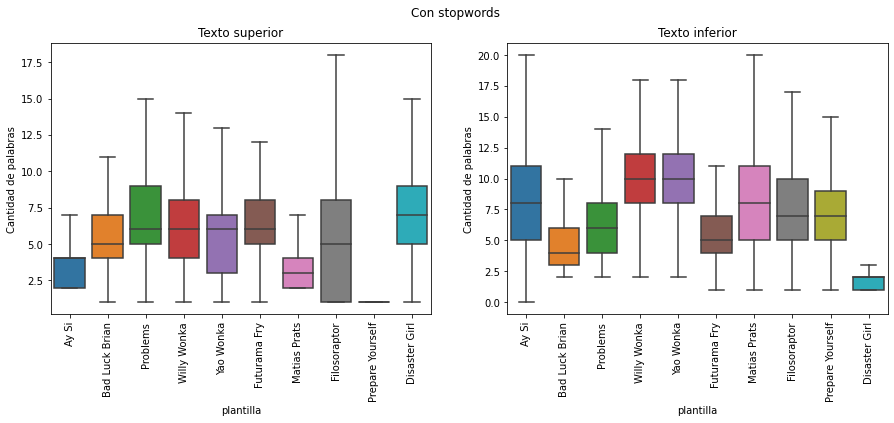

In [24]:
### Con stopwords
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.boxplot(x="plantilla", y="n_w_text_1", data=data, orient="vertical", showfliers=False, ax = ax[0])
ax[0].tick_params('x', labelrotation=90)
ax[0].title.set_text('Texto superior')
ax[0].set_ylabel('Cantidad de palabras')

# Sin stopwords
sns.boxplot(x="plantilla", y="n_w_text_2", data=data, orient="vertical", showfliers=False, ax = ax[1])
ax[1].tick_params('x', labelrotation=90)
ax[1].title.set_text('Texto inferior')
ax[1].set_ylabel('Cantidad de palabras')


fig.suptitle("Con stopwords")
plt.show()


#### Sin stopwords

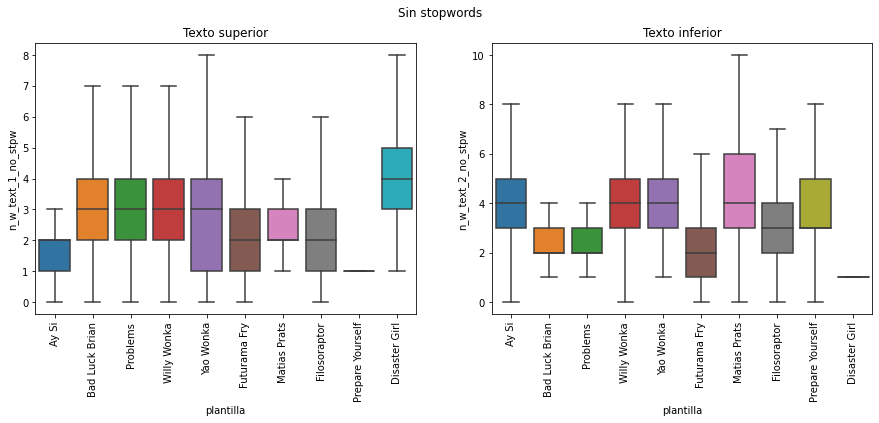

In [9]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.boxplot(x="plantilla", y="n_w_text_1_no_stpw", data=data, orient="vertical", showfliers=False, ax = ax[0])
ax[0].tick_params('x', labelrotation=90)
ax[0].title.set_text('Texto superior')

# Sin stopwords
sns.boxplot(x="plantilla", y="n_w_text_2_no_stpw", data=data, orient="vertical", showfliers=False, ax = ax[1])
ax[1].tick_params('x', labelrotation=90)
ax[1].title.set_text('Texto inferior')

fig.suptitle("Sin stopwords")
plt.show()


#### Porcentaje de texto debido a stopwords y distribución

In [10]:
data["text_1_perc_stw"] = data["n_w_text_1_no_stpw"].divide(data["n_w_text_1"].replace(0,np.nan))
data["text_2_perc_stw"] = data["n_w_text_2_no_stpw"].divide(data["n_w_text_2"].replace(0,np.nan))

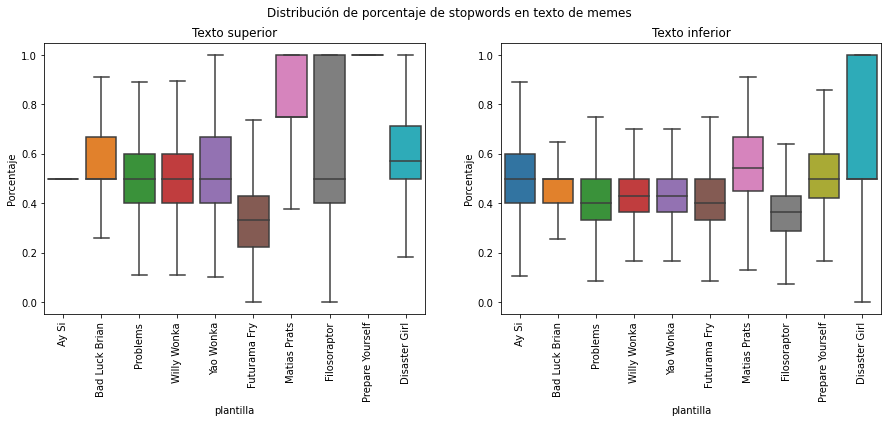

In [27]:
# Porcentaje de stopwords
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.boxplot(x="plantilla", y="text_1_perc_stw", data=data, orient="vertical", showfliers=False, ax = ax[0])
ax[0].tick_params('x', labelrotation=90)
ax[0].title.set_text('Texto superior')
ax[0].set_ylabel('Porcentaje')

sns.boxplot(x="plantilla", y="text_2_perc_stw", data=data, orient="vertical", showfliers=False, ax = ax[1])
ax[1].tick_params('x', labelrotation=90)
ax[1].title.set_text('Texto inferior')
ax[1].set_ylabel('Porcentaje')


fig.suptitle("Distribución de porcentaje de stopwords en texto de memes")
plt.show()


### Proporción de palabras entre texto superior y texto inferior

In [12]:
data["rel_text_1_2"] = data["n_w_text_1"].divide(data["n_w_text_2"].replace(0,np.nan))
data["rel_text_1_2_no_stpw"] =  data["n_w_text_1_no_stpw"].divide(data["n_w_text_2_no_stpw"].replace(0,np.nan))



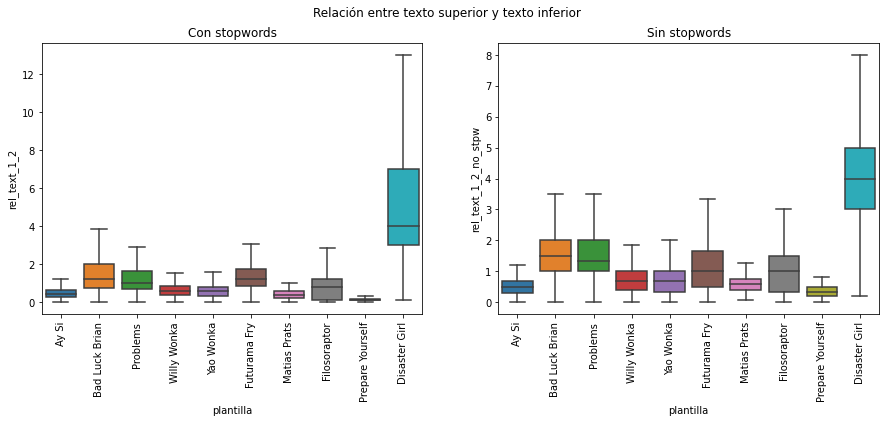

In [13]:
fig, ax = plt.subplots(1, 2,figsize=(15, 5))
sns.boxplot(x="plantilla", y="rel_text_1_2", data=data, orient="vertical", showfliers=False, ax = ax[0])
ax[0].tick_params('x', labelrotation=90)
ax[0].title.set_text('Con stopwords')

# Sin stopwords
sns.boxplot(x="plantilla", y="rel_text_1_2_no_stpw", data=data, orient="vertical", showfliers=False, ax = ax[1])
ax[1].tick_params('x', labelrotation=90)
ax[1].title.set_text('Sin stopwords')

fig.suptitle("Relación entre texto superior y texto inferior")
plt.show()


### N- gramas

In [14]:
### Función para calcular top n k-gramas

# Following code grabbed from:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# we will use it in our context to create some visualizations.
def get_top_n_words(data,text_label,n=1,k=1,stopwords=None):
    template = data["plantilla"].unique()
    template_top_n_k_gram = {}
    for t in template:
        corpus = data[data["plantilla"]==t][text_label]
        corpus.dropna(inplace=True)
        #if stopwords is not None:
        vec = CountVectorizer(ngram_range=(k,k),stop_words = stopwords).fit(corpus)
        #else:
        #    vec = CountVectorizer(ngram_range=(k,k)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        template_top_n_k_gram[t] = words_freq[:n]
    return template_top_n_k_gram
    

In [15]:
### Texto superior
# 1-gramas (top 20)
common_words_1       = get_top_n_words(data,"text_1", 20,1)
common_words_1_no_stpw = get_top_n_words(data,"text_1", 20,1,stopwords=stop_words)

# 2-gramas (top 20)
common_words_2       = get_top_n_words(data,"text_1", 20,2)
common_words_2_no_stpw = get_top_n_words(data,"text_1", 20,2,stopwords=stop_words)

# 3-gramas (top 20)
common_words_3       = get_top_n_words(data,"text_1", 20,3)
common_words_3_no_stpw = get_top_n_words(data,"text_1", 20,3,stopwords=stop_words)


<ipython-input-14-83cc450a1e3a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus.dropna(inplace=True)


In [22]:
### Texto inferior
# 1-gramas (top 20)
common_words_1_inf       = get_top_n_words(data,"text_2", 20,1)
common_words_1_inf_no_stpw = get_top_n_words(data,"text_2", 20,1,stopwords=stop_words)

# 2-gramas (top 20)
common_words_inf_2       = get_top_n_words(data,"text_2", 20,2)
common_words_inf_2_no_stpw = get_top_n_words(data,"text_2", 20,2,stopwords=stop_words)

# 3-gramas (top 20)
common_words_inf_3       = get_top_n_words(data,"text_2", 20,3)
common_words_inf_3_no_stpw = get_top_n_words(data,"text_2", 20,3,stopwords=stop_words)


<ipython-input-14-83cc450a1e3a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus.dropna(inplace=True)


In [16]:
common_words_3

{'Ay Si': [('si ay si', 122392),
  ('ay si ay', 122109),
  ('si uy si', 6886),
  ('uy si uy', 6853),
  ('ay ay si', 1162),
  ('si hay si', 796),
  ('ay siay si', 517),
  ('hay si hay', 410),
  ('ay si hay', 315),
  ('hay hay si', 170),
  ('ay si me', 169),
  ('aysi ay si', 147),
  ('ay si ahora', 118),
  ('sii ay si', 113),
  ('uy uy si', 113),
  ('ay si soy', 107),
  ('ay sii ay', 101),
  ('asi ay si', 90),
  ('sy ay si', 85),
  ('ay ay ay', 84)],
 'Bad Luck Brian': [('por primera vez', 4060),
  ('se compra un', 2627),
  ('se compra una', 1015),
  ('se va de', 677),
  ('de su vida', 584),
  ('primer dia de', 582),
  ('en su casa', 569),
  ('es su cumpleanos', 510),
  ('le dicen que', 487),
  ('por primera ves', 463),
  ('le regalan un', 462),
  ('primera vez que', 460),
  ('se tira un', 449),
  ('se hace el', 414),
  ('compra un celular', 389),
  ('para que no', 379),
  ('su primer dia', 365),
  ('se hace un', 354),
  ('se compra el', 352),
  ('primera vez en', 340)],
 'Problems': [('

In [17]:
common_words_2

{'Ay Si': [('ay si', 284270),
  ('si ay', 122434),
  ('uy si', 16405),
  ('hay si', 11612),
  ('si uy', 6891),
  ('ay ay', 1255),
  ('huy si', 1041),
  ('si hay', 802),
  ('siay si', 528),
  ('ay siay', 520),
  ('si me', 202),
  ('me creo', 200),
  ('hay hay', 176),
  ('aysi ay', 147),
  ('por que', 145),
  ('si ahora', 136),
  ('uy uy', 123),
  ('si soy', 121),
  ('sii ay', 116),
  ('no me', 113)],
 'Bad Luck Brian': [('se compra', 5396),
  ('en el', 5020),
  ('primera vez', 4938),
  ('compra un', 4600),
  ('por primera', 4556),
  ('en la', 4308),
  ('de la', 3777),
  ('se va', 3529),
  ('va al', 3388),
  ('dice que', 2408),
  ('se hace', 2344),
  ('su primer', 2326),
  ('de su', 2210),
  ('hace un', 2130),
  ('compra una', 1938),
  ('su novia', 1871),
  ('en su', 1813),
  ('pide un', 1696),
  ('va la', 1682),
  ('su mama', 1674)],
 'Problems': [('me dijo', 11434),
  ('dijo que', 7977),
  ('le dije', 4803),
  ('que me', 2175),
  ('que no', 2072),
  ('dije que', 1902),
  ('que era', 14

In [18]:
common_words_1

{'Ay Si': [('si', 314984),
  ('ay', 286608),
  ('uy', 16616),
  ('hay', 11918),
  ('me', 1214),
  ('que', 1200),
  ('huy', 1075),
  ('la', 969),
  ('el', 962),
  ('de', 956),
  ('no', 893),
  ('se', 643),
  ('en', 598),
  ('te', 568),
  ('siay', 531),
  ('soy', 476),
  ('es', 434),
  ('un', 424),
  ('ya', 417),
  ('mi', 374)],
 'Bad Luck Brian': [('se', 46926),
  ('de', 44010),
  ('la', 39872),
  ('el', 36845),
  ('un', 36273),
  ('su', 27795),
  ('en', 27721),
  ('no', 24824),
  ('le', 22148),
  ('una', 20629),
  ('va', 20331),
  ('que', 19277),
  ('para', 15451),
  ('al', 14834),
  ('por', 13678),
  ('compra', 11761),
  ('con', 11169),
  ('hace', 9731),
  ('quiere', 9539),
  ('es', 8814)],
 'Problems': [('me', 22078),
  ('que', 16944),
  ('dijo', 13174),
  ('la', 8175),
  ('le', 7542),
  ('el', 6146),
  ('de', 5857),
  ('no', 5836),
  ('dije', 5202),
  ('un', 3703),
  ('en', 3192),
  ('solo', 2805),
  ('mi', 2790),
  ('se', 2754),
  ('te', 2461),
  ('cuando', 2460),
  ('era', 2402),


In [19]:
common_words_3_no_stpw

{'Ay Si': [('ay ay ay', 330),
  ('ay sii ay', 101),
  ('ay sy ay', 85),
  ('ay asi ay', 84),
  ('ay gran vaina', 71),
  ('ay ay ahora', 63),
  ('ay ai ay', 41),
  ('ay siii ay', 34),
  ('ay ay creo', 33),
  ('creo ay ay', 33),
  ('uy uy uy', 22),
  ('memes ay ay', 19),
  ('ay ay voy', 17),
  ('facebook ay ay', 17),
  ('ay 2c ay', 16),
  ('ay ay hoy', 16),
  ('gran vaina ay', 16),
  ('meme ay ay', 15),
  ('ayy sii ay', 14),
  ('malote ay ay', 11)],
 'Bad Luck Brian': [('primer dia clases', 270),
  ('va primera vez', 254),
  ('masturba primera vez', 229),
  ('disimular pedo vomita', 210),
  ('call of duty', 193),
  ('intenta toser disimular', 178),
  ('toser disimular pedo', 170),
  ('abre ventana salga', 160),
  ('juega primera vez', 145),
  ('lados cruzar calle', 134),
  ('sexo primera vez', 134),
  ('ventana salga mosquito', 128),
  ('estudia toda noche', 126),
  ('hace fiesta casa', 126),
  ('juega counter strike', 124),
  ('juega resident evil', 120),
  ('juega call of', 119),
  ('g

In [20]:
common_words_2_no_stpw

{'Ay Si': [('ay ay', 123408),
  ('uy uy', 6994),
  ('ay siay', 520),
  ('aysi ay', 147),
  ('ay ahora', 126),
  ('sii ay', 116),
  ('ay sii', 112),
  ('gran vaina', 104),
  ('ay asi', 94),
  ('sy ay', 91),
  ('asi ay', 90),
  ('ay sy', 89),
  ('ai ay', 80),
  ('ay gran', 78),
  ('huy huy', 55),
  ('ay creo', 50),
  ('ayy ay', 50),
  ('creo ay', 46),
  ('ay ai', 43),
  ('facebook ay', 42)],
 'Bad Luck Brian': [('primera vez', 4938),
  ('primer dia', 1012),
  ('quiere ser', 931),
  ('consigue novia', 746),
  ('quiere hacer', 729),
  ('va ver', 613),
  ('primera ves', 583),
  ('va comprar', 526),
  ('compra celular', 480),
  ('quiere ir', 441),
  ('cumple anos', 408),
  ('va primera', 380),
  ('va jugar', 379),
  ('va concierto', 370),
  ('sale vacaciones', 358),
  ('dia clases', 343),
  ('quiere jugar', 339),
  ('toda noche', 334),
  ('juega minecraft', 331),
  ('pide ascenso', 327)],
 'Problems': [('dijo solo', 1188),
  ('dijo iba', 597),
  ('solo puntita', 570),
  ('dijo hariamos', 400

In [21]:
common_words_1_no_stpw

{'Ay Si': [('ay', 286608),
  ('uy', 16616),
  ('huy', 1075),
  ('siay', 531),
  ('ahora', 340),
  ('creo', 232),
  ('dice', 186),
  ('aysi', 180),
  ('sii', 162),
  ('gran', 140),
  ('cree', 139),
  ('dicen', 135),
  ('voy', 134),
  ('asi', 127),
  ('va', 127),
  ('sy', 116),
  ('vaina', 107),
  ('ayy', 104),
  ('mejor', 95),
  ('solo', 93)],
 'Bad Luck Brian': [('va', 20331),
  ('compra', 11761),
  ('hace', 9731),
  ('quiere', 9539),
  ('juega', 8182),
  ('primera', 7024),
  ('pide', 6225),
  ('vez', 5522),
  ('dice', 5017),
  ('novia', 4911),
  ('sale', 3931),
  ('dia', 3809),
  ('primer', 3603),
  ('nadie', 3354),
  ('casa', 3212),
  ('llega', 2791),
  ('crea', 2716),
  ('entra', 2706),
  ('hacer', 2703),
  ('pone', 2659)],
 'Problems': [('dijo', 13174),
  ('dije', 5202),
  ('solo', 2805),
  ('dijeron', 1138),
  ('queria', 1041),
  ('puntita', 994),
  ('iba', 972),
  ('vamos', 534),
  ('hacer', 534),
  ('casa', 524),
  ('ser', 503),
  ('hoy', 492),
  ('ver', 485),
  ('noche', 484),


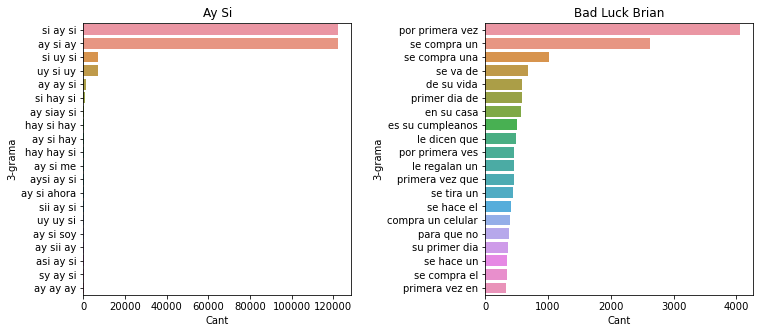

In [56]:
template_name = ['Ay Si','Bad Luck Brian']
fig, ax = plt.subplots(1, 2,figsize=(12, 5))
for t in range(0,2):
    n_gram_3 = pd.DataFrame(common_words_3[template_name[t]], columns = ["3-grama","Cant"])
    sns.barplot(x="Cant",y="3-grama",data=n_gram_3, orient='h', ax=ax[t])
    ax[t].set_title(template_name[t])
    
plt.subplots_adjust(wspace=0.5)